In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# Q1

# Create TC matrix
n = 240
AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
DO = np.array([15,20,25,15,20,25])

TC = np.array([([0] * AV[i] + (([1] * DO[i] + [0] * (IV[i] - DO[i])) * int(n/IV[i])))[0:240] for i in range(6)], \
              dtype = 'object')

# Standardize

for i in range(6):
    TC[i] = (TC[i] - np.mean(TC[i]))/np.std(TC[i])

TC

array([[1.0, 1.0, 1.0, ..., -1.0, -1.0, -1.0],
       [-0.8451542547285147, -0.8451542547285147, -0.8451542547285147,
        ..., -0.8451542547285147, -0.8451542547285147,
        -0.8451542547285147],
       [1.1832159566199205, 1.1832159566199205, 1.1832159566199205, ...,
        -0.8451542547285148, -0.8451542547285148, -0.8451542547285148],
       [1.2909944487358056, 1.2909944487358056, 1.2909944487358056, ...,
        -0.7745966692414834, -0.7745966692414834, -0.7745966692414834],
       [1.0, 1.0, 1.0, ..., -1.0, -1.0, -1.0],
       [0.7745966692414834, 0.7745966692414834, 0.7745966692414834, ...,
        -1.2909944487358056, -1.2909944487358056, -1.2909944487358056]],
      dtype=object)

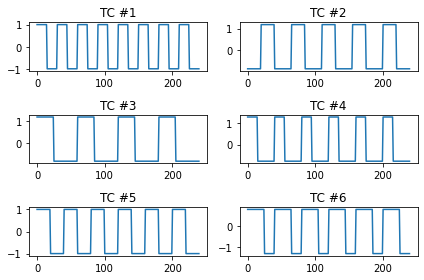

In [103]:
figure, axis = plt.subplots(3, 2)

for i in range(6):
    axis[int(i/2), i%2].plot(range(240), TC[i])
    axis[int(i/2), i%2].set_title("TC #" + str(i + 1))
    
figure.tight_layout()
plt.show()